<a href="https://colab.research.google.com/github/nikdrako/Machine-learning-projects/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NeighborhoodComponentsAnalysis, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [ ]:
columns = ['Sex','Lenght','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']
df = pd.read_csv('abalone.data', header = None, names=columns)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Lenght          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None


In [ ]:
df.describe()

,Lenght,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
df['Sex'].value_counts()

,count
Sex,
M,1528
I,1342
F,1307


<Axes: >

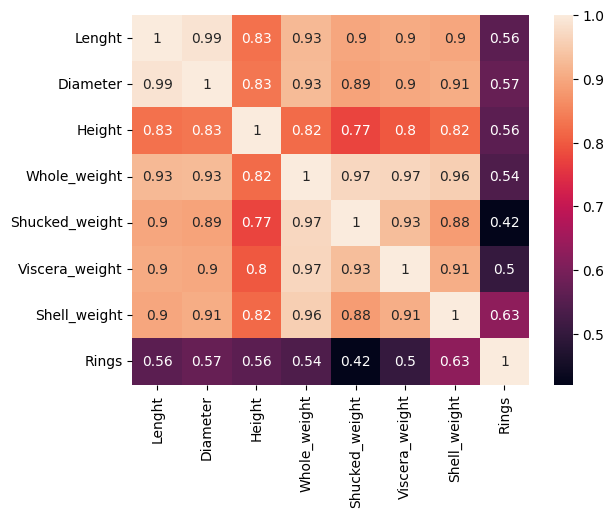

In [ ]:
corr_matr = df.iloc[:,1:].corr()
sns.heatmap(corr_matr,annot=True)

Бачимо ого яку кореляцію, але не з таргетом і чесно не знаю що робити з такою аж кореляцією, бо все між собою корелює більше ніж 0.8, тому не знаю що робити.

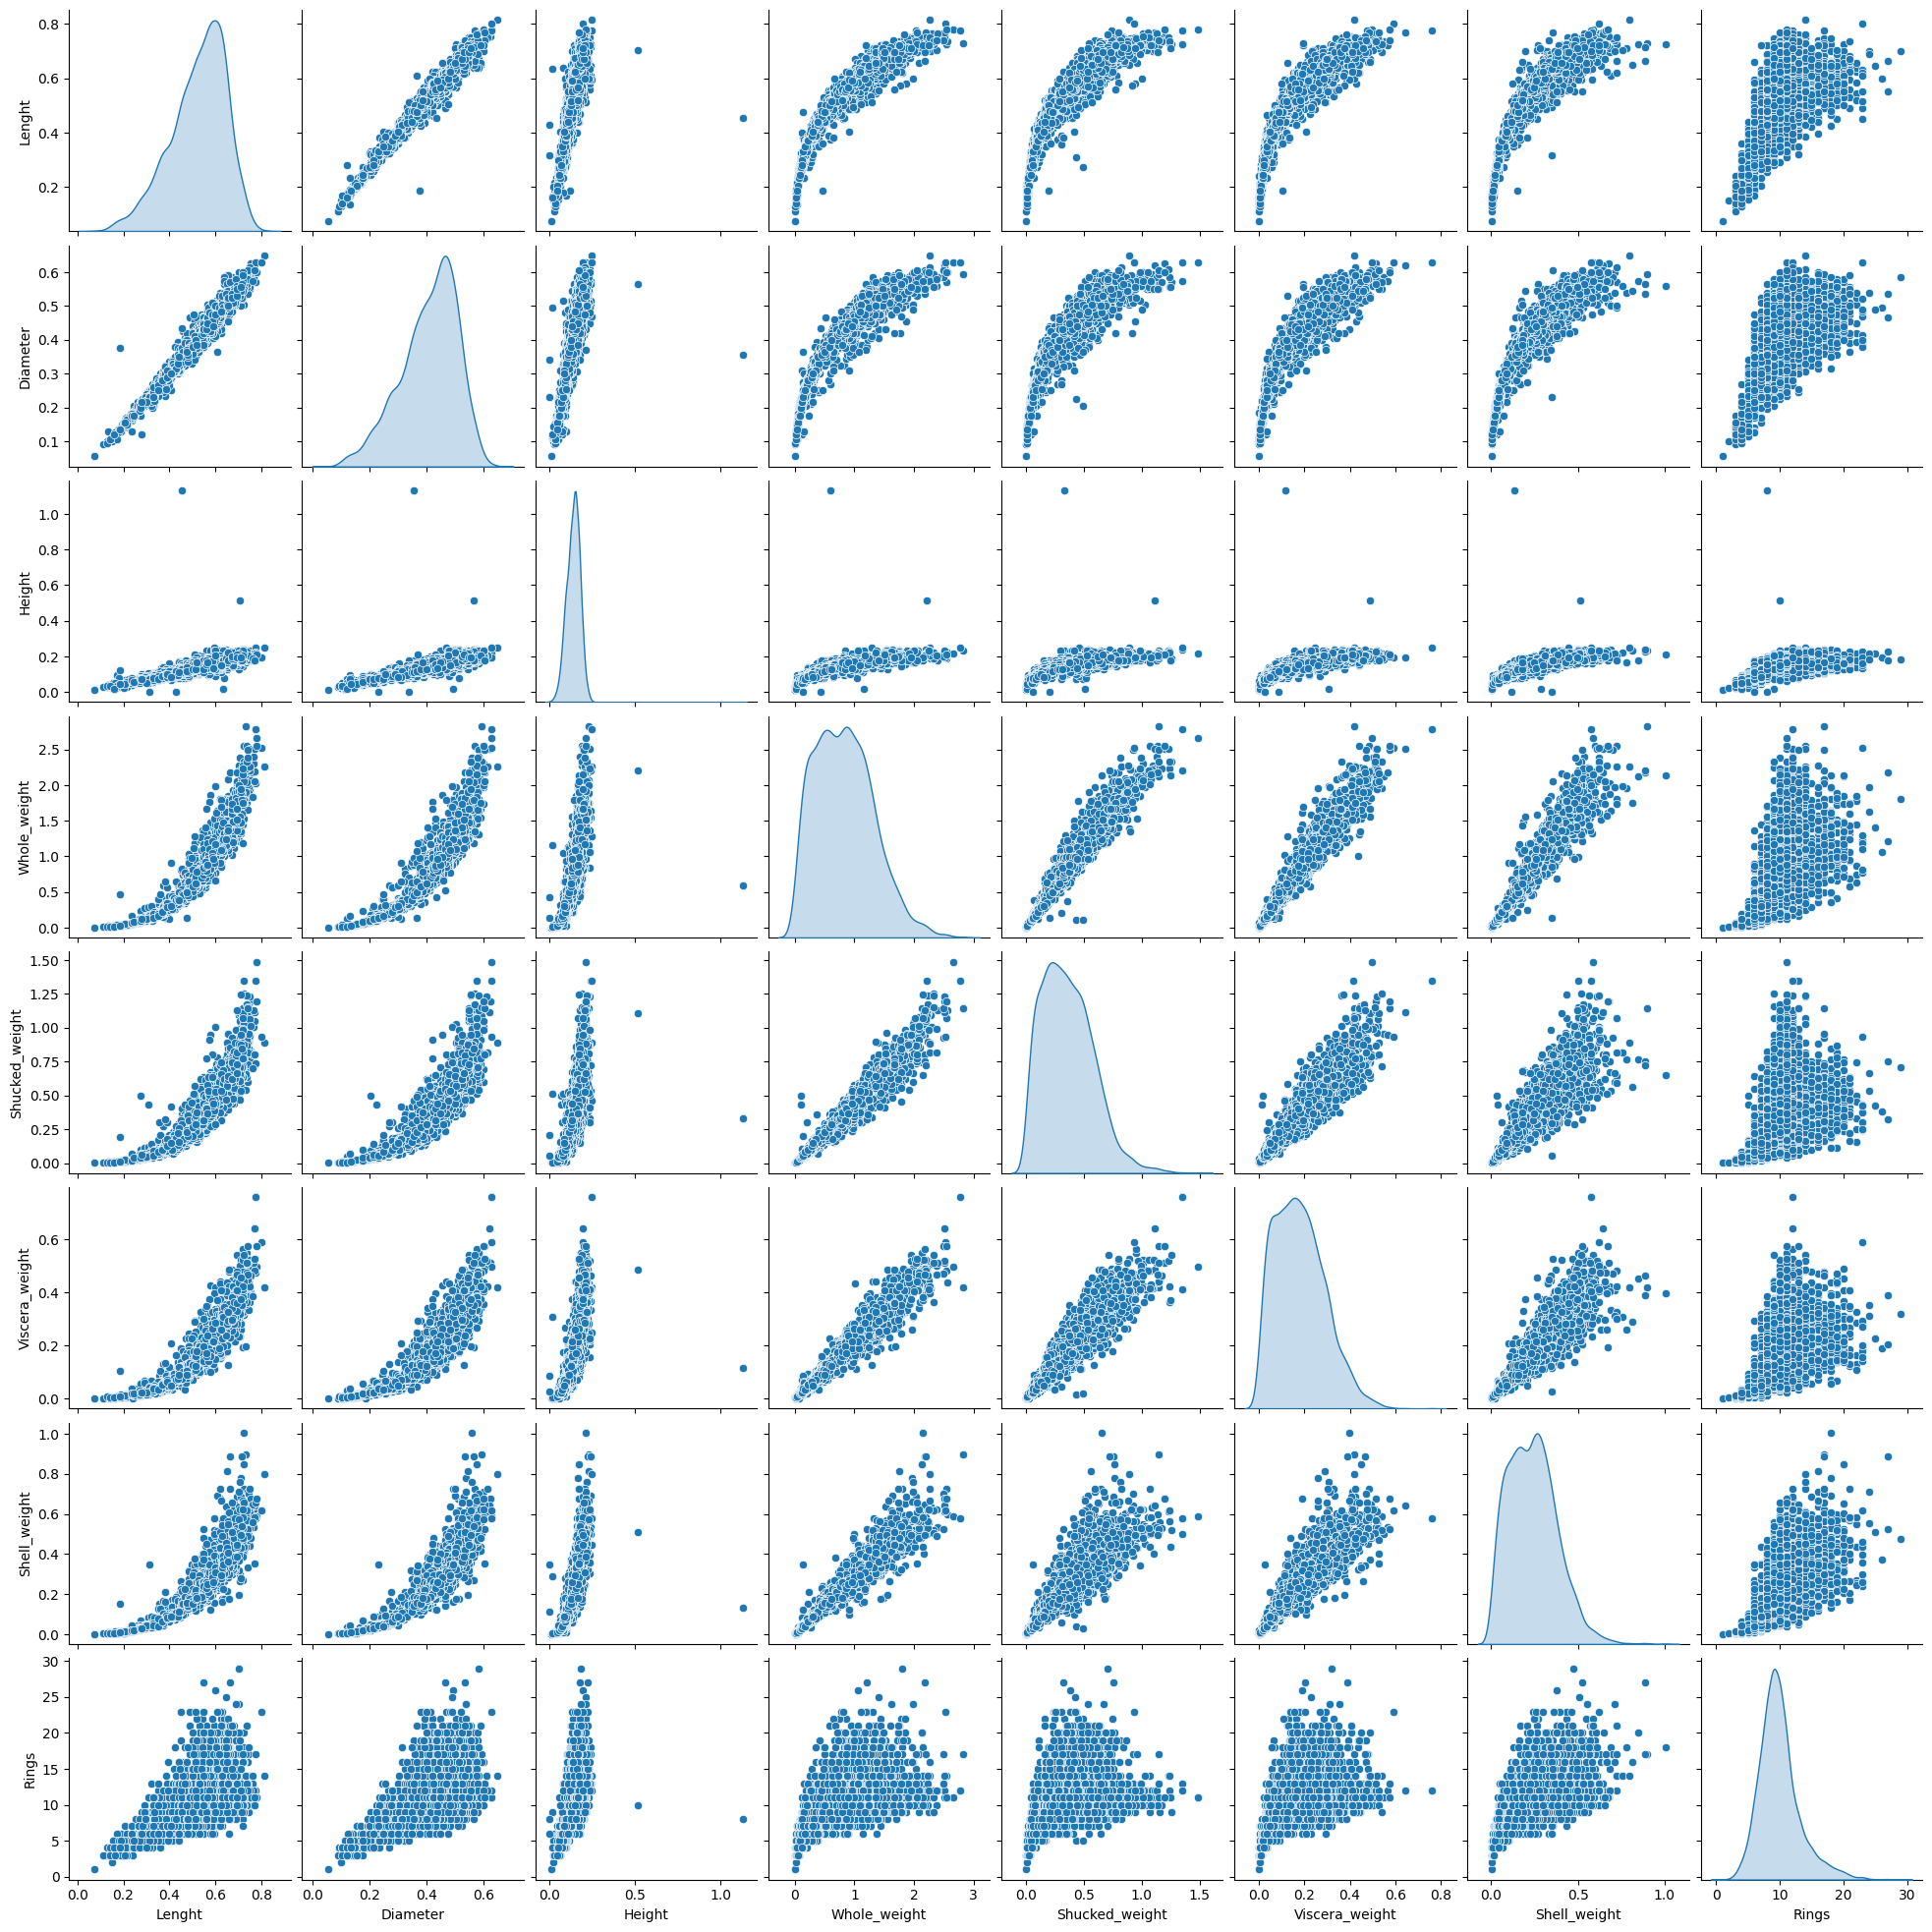

In [ ]:
sns.pairplot(df,diag_kind= 'kde')

По діагоналі в нас розподіл ознак, бачимо що в цілому він досить нормальний, подекуди завалений вправо або вліво

Самі фічі очевидно корелюють між собою досить сильно, що і видно на графіках

<Axes: ylabel='Height'>

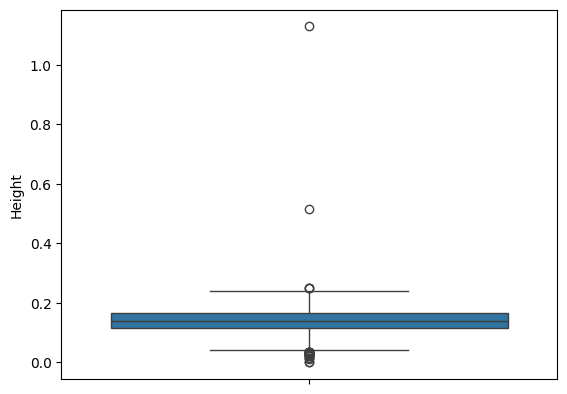

In [ ]:
sns.boxplot(df['Height'])

Сильний аутлеєр, що може стати проблемою, тому викину його

,Sex,Lenght,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


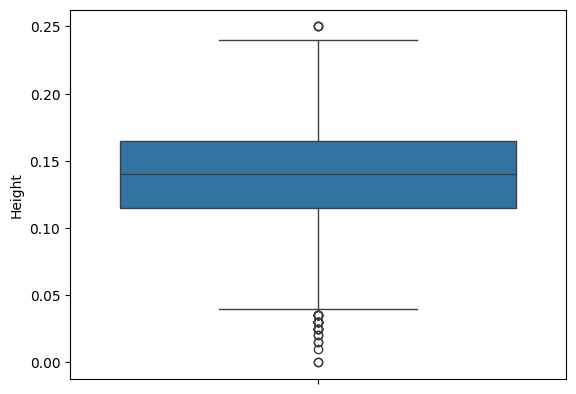

In [ ]:
df= df[df['Height'] <= 0.5]
sns.boxplot(df['Height'])
df

In [ ]:
df['Rings'].value_counts()

,count
Rings,
9,689
10,633
8,567
11,487
7,391
12,267
6,259
13,203
14,126


Попробувавши побудувати модель з незбалансованою цільовою змінною отримав дуже погані результати, тому

Оскільки наша цільова змінна є сильно незбалансованою, та в деяких класах присутні лише по 1-10 екземплярів то думаю можемо обєднати класи, які менше 5 в клас під назвою 5 та класи, які більше за 15 в клас під назвою 15.


In [ ]:
def transform_rings(value):
    if value >= 15:
        return 15
    elif value < 5:
        return 5
    return value

In [ ]:
df['Rings'] = df['Rings'].apply(transform_rings)

<ipython-input-802-b2f5ed6f8881>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rings'] = df['Rings'].apply(transform_rings)


In [ ]:
df['Rings'].value_counts()

,count
Rings,
9,689
10,633
8,567
11,487
7,391
15,364
12,267
6,259
13,203


Створимо нову фічу,  середнє між довжина висота і діаметр

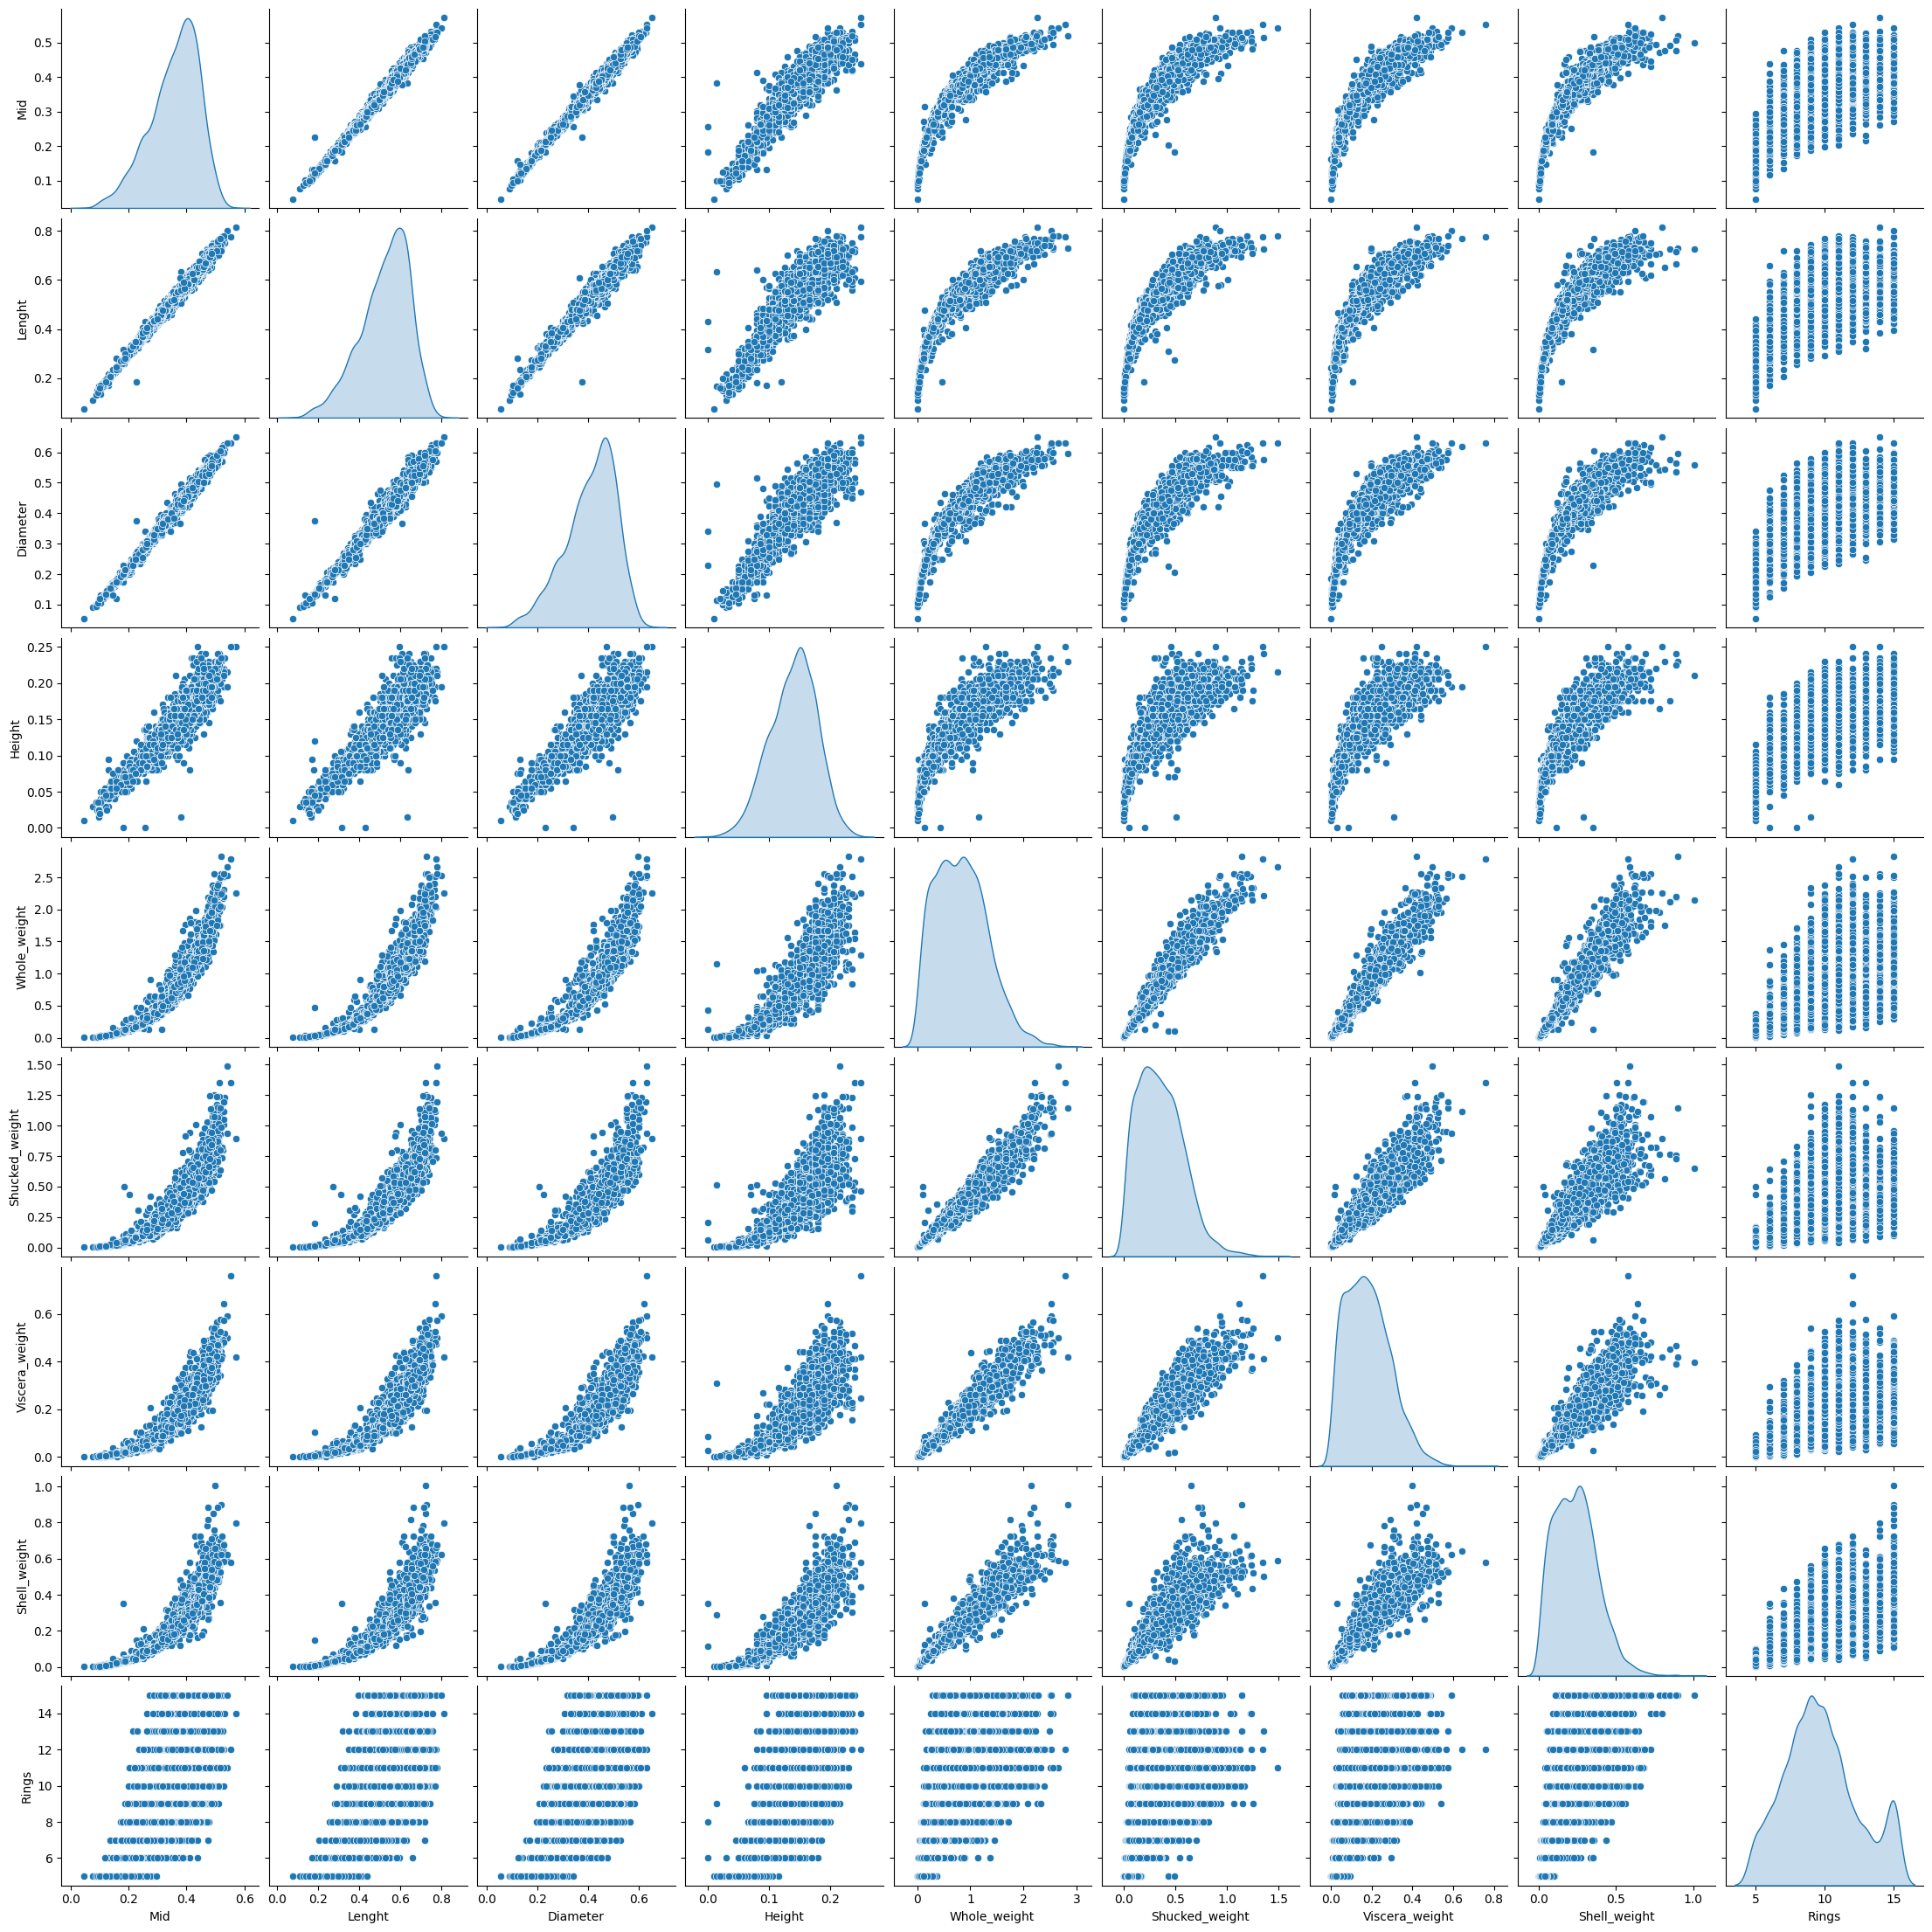

In [ ]:
df.insert(0, 'Mid', (df['Lenght']+df['Diameter']+df['Height'])/3)
sns.pairplot(df,diag_kind= 'kde')

Бачимо тепер набагато більше збалансвоані класи

In [ ]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

Також маємо категоріальну змінну про стать, обробляємо чере get_dummied

In [ ]:
X=pd.get_dummies(X, columns=['Sex'], drop_first=True)
X

,Mid,Lenght,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0.305000,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,False,True
1,0.235000,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,False,True
2,0.361667,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,False,False
3,0.310000,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,False,True
4,0.221667,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,True,False
...,...,...,...,...,...,...,...,...,...,...
4172,0.393333,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,False,False
4173,0.388333,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,False,True
4174,0.426667,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,False,True
4175,0.420000,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,False,False


In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)

# *NeighborhoodComponentsAnalysis*

In [ ]:
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=30)

In [ ]:
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])

In [ ]:
nca_pipe.fit(X_train, y_train)
print("Roc_auc_score", roc_auc_score(y_test, nca_pipe.predict_proba(X_test), average='macro',multi_class='ovr'))

Roc_auc_score 0.765881027200662


In [ ]:
y_pred = nca_pipe.predict(X_test)
print("F1 score:",f1_score(y_test,y_pred,average='weighted'))
print("Precision_score:",precision_score(y_test,y_pred,average='weighted'))

F1 score: 0.26858068017531
Precision_score: 0.25875963963477994


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# NearestCentroid

In [ ]:
from sklearn.neighbors import NearestCentroid
nce = NearestCentroid()
nce.fit(X_train, y_train)

NearestCentroid()

In [ ]:
y_pred = nce.predict(X_test)
print(f1_score(y_test,y_pred,average='weighted'))
print(precision_score(y_test,y_pred,average='weighted'))
roc_auc_score(y_test, nce.predict_proba(X_test), multi_class='ovr')

0.23580516861824385
0.23513913249966384


0.732533266506772

# *LogisticRegression*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [ ]:
clf = LogisticRegression(solver="liblinear").fit(X_train, y_train)
roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

0.7916667262698492

In [ ]:
y_pred = clf.predict(X_test)
print(f1_score(y_test,y_pred,average='weighted'))
print(recall_score(y_test,y_pred,average='weighted'))

0.25889411225608716
0.2934131736526946


# *KNeighborsClassifier*

In [ ]:
knc = KNeighborsClassifier(n_neighbors = 30)

In [ ]:
knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [ ]:
y_pred = knc.predict(X_test)
print(f1_score(y_test,y_pred,average='weighted'))
print(recall_score(y_test,y_pred,average='weighted'))
roc_auc_score(y_test, knc.predict_proba(X_test), multi_class='ovr')

0.28726936319910434
0.3029940119760479


0.7523087252659933

# *RadiusNeighborsClassifier*

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier

rns = RadiusNeighborsClassifier(radius= 1.5 ,algorithm = 'auto',weights = 'distance')

In [ ]:
rns.fit(X_train,y_train)

RadiusNeighborsClassifier(radius=1.5, weights='distance')

In [ ]:
y_pred = rns.predict(X_test)
print(f1_score(y_test,y_pred,average='weighted'))
print(recall_score(y_test,y_pred,average='weighted'))
roc_auc_score(y_test, rns.predict_proba(X_test), multi_class='ovr')

0.25784849028356166
0.2778443113772455


0.758574919970536